In [1]:
import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('ignore')

from wxdata import radar, geog

import matplotlib.pyplot as plt
%matplotlib inline

%env WORKDIR ~/Documents/weatherpy-work

env: WORKDIR=~/Documents/weatherpy-work


In [2]:
order = radar.OrderLevel2()
selection = order.select_around('KVNX', '2012-04-15 00:27')
selection.items

['2012/04/15/KVNX/KVNX20120415_002743_V06.gz']

In [3]:
file = selection[0].download()[0]

/Users/jitang/anaconda/envs/basemapenv/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2018-01-29 20:18:35.273461. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


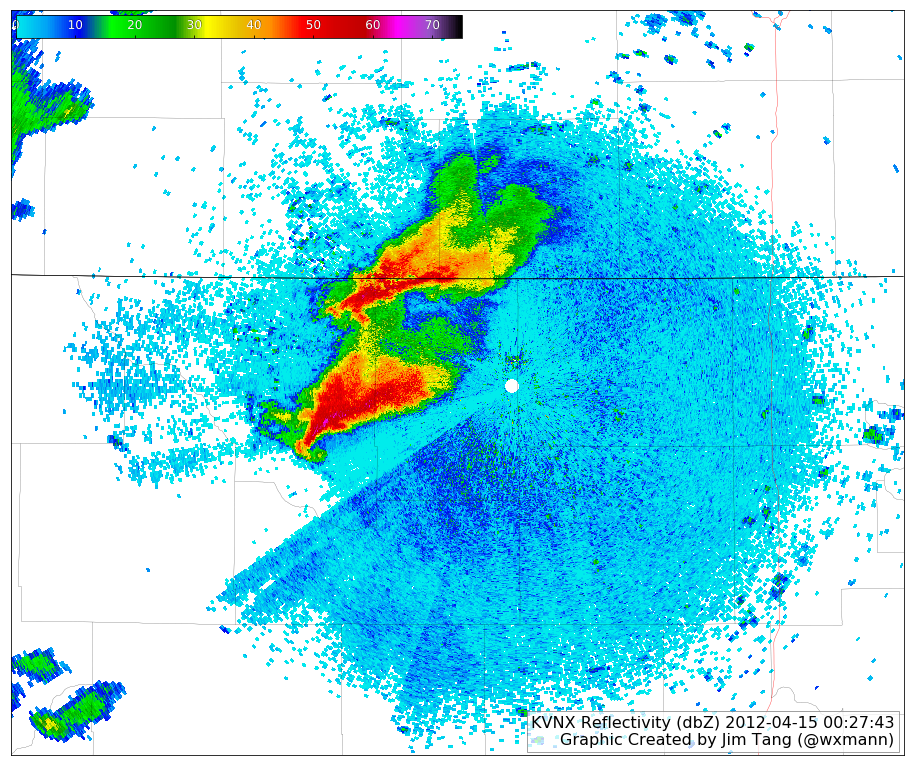

In [14]:
fig = plt.figure(figsize=(16, 16))

sample, display = radar.plot_level2(file, 'reflectivity', sweep=0, zoom_km=(120, 100), shift_latlon=(0, -0.15))

from wxdata.plotting import bottom_right_textbox, inset_colorbar
timestamp = radar.timestamp_from_filename(file)

title = 'KVNX Reflectivity (dbZ) {}\nGraphic Created by Jim Tang (@wxmann)'.format(
    timestamp.strftime('%Y-%m-%d %H:%M:%S'))

bottom_right_textbox(display.basemap.ax, title)
inset_colorbar(display.plots[0], display.basemap.ax, tickcolor='white', loc=2, width='50%')